In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import OrdinalEncoder
from sklearn.decomposition import KernelPCA
from sklearn.pipeline import make_pipeline

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/digipodium/Datasets/main/regression/Mall_Customers.csv')
df

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [3]:
prep_pipeline = make_pipeline(
    OrdinalEncoder(), 
    KernelPCA(n_components=2),
)

In [4]:
features = prep_pipeline.fit_transform(df.drop(columns=['CustomerID']))

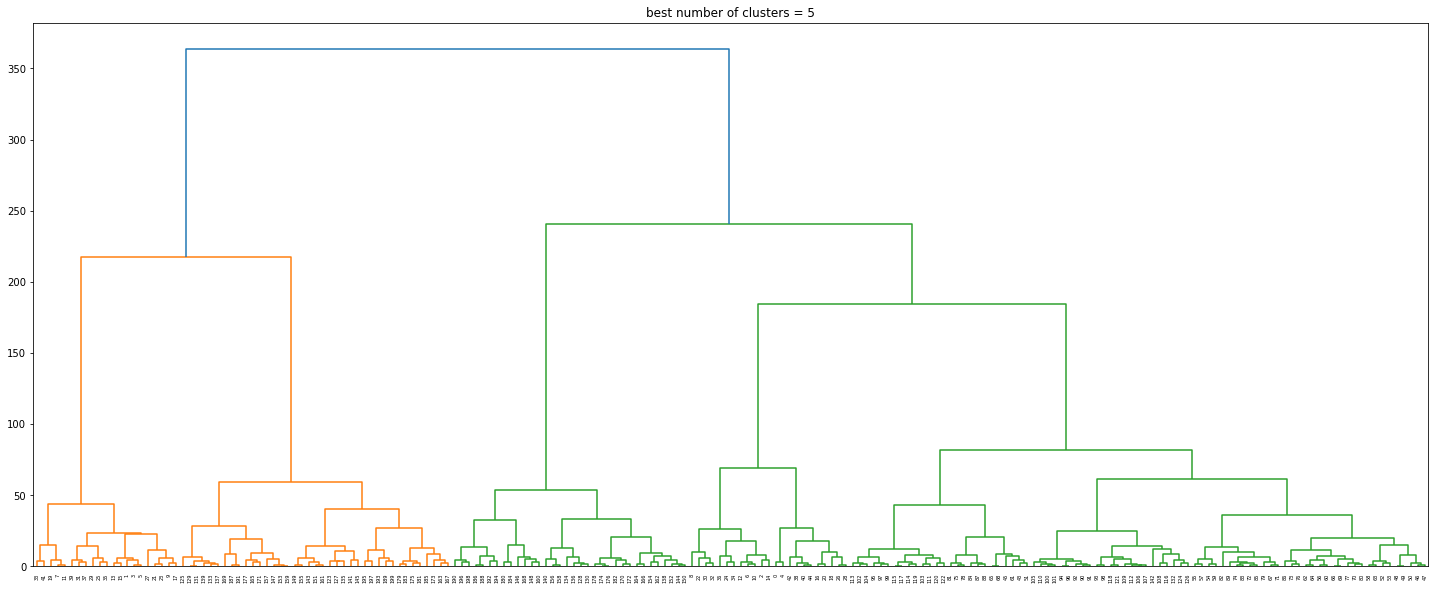

In [5]:
plt.figure(figsize=(25,10))
dendrogram(linkage(features, method='ward'))
plt.title('best number of clusters = 5')
plt.show()


In [6]:
X = df.drop(columns=['CustomerID'])
model = make_pipeline(
    prep_pipeline, 
    AgglomerativeClustering(n_clusters=5)
)
groups = model.fit_predict(X)

In [7]:
X['groups'] = groups
X

,Genre,Age,Annual Income (k$),Spending Score (1-100),groups
0,Male,19,15,39,1
1,Male,21,15,81,3
2,Female,20,16,6,1
3,Female,23,16,77,3
4,Female,31,17,40,1
...,...,...,...,...,...
195,Female,35,120,79,4
196,Female,45,126,28,2
197,Male,32,126,74,4
198,Male,32,137,18,2


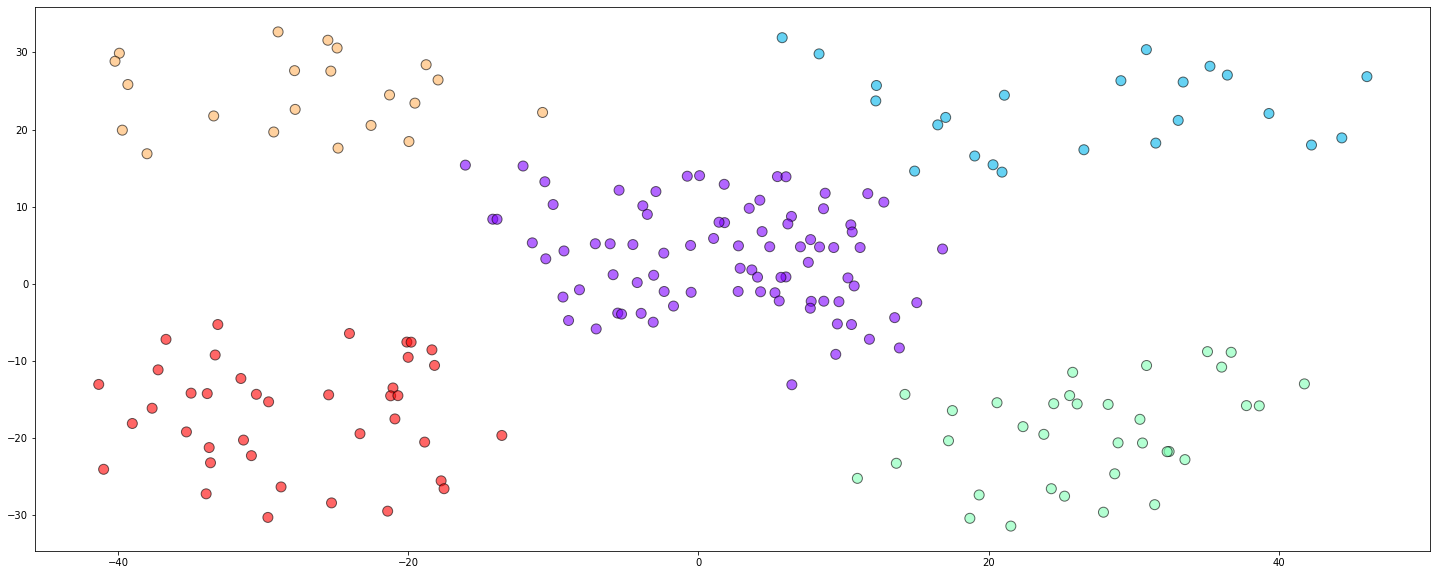

In [8]:
plt.figure(figsize=(25,10))
plt.scatter(x=features[:,0], y=features[:,1], 
    c=groups, cmap='rainbow', s=100, edgecolors='black', alpha=.6)